# 심층 신경망

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 2개의 층
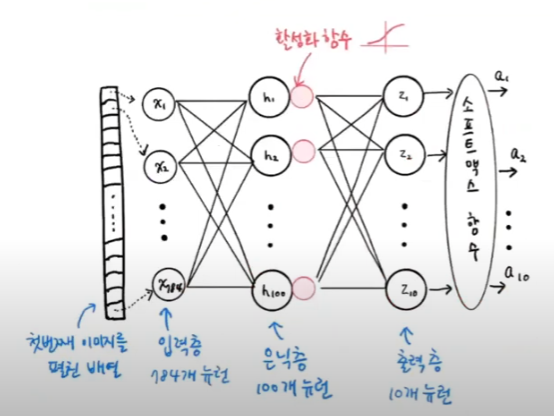
* 은닉층은 뉴런개수는 정해지지는 않았으나 입력층 뉴런보다 작고 
  출력층 뉴런보다 큰 값을 잡는다.

In [2]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [4]:
# 입력층의 선형값을 비선형값으로 바꾸어 압축
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

## 심층 신경망 만들기

In [5]:
model = keras.Sequential([dense1, dense2])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 층을 추가하는 다른 방법

In [7]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [8]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [9]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5710 - accuracy: 0.8064
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4132 - accuracy: 0.8509
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3776 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3530 - accuracy: 0.8732
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3344 - accuracy: 0.8782


In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3607 - accuracy: 0.8669


[0.3606799244880676, 0.8669166564941406]

## 렐루 활성화 함수

In [13]:
model = keras.Sequential()
# 입력층의 이미지를 1차원배열형태로 만들어주기위해 케라스에서 제공하는 전용 입력층
model.add(keras.layers.Flatten(input_shape=(28, 28)))
# relu: 은닉층에 사용하는 활성화 함수로써 sigmoid 함수보다 성능이 더 좋은 것으로
# 알려져 있다.
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [15]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [16]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5291 - accuracy: 0.8113
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3923 - accuracy: 0.8578
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3540 - accuracy: 0.8719
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3323 - accuracy: 0.8808
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3137 - accuracy: 0.8866


In [17]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3797 - accuracy: 0.8702


[0.37970128655433655, 0.8702499866485596]

## 옵티마이저
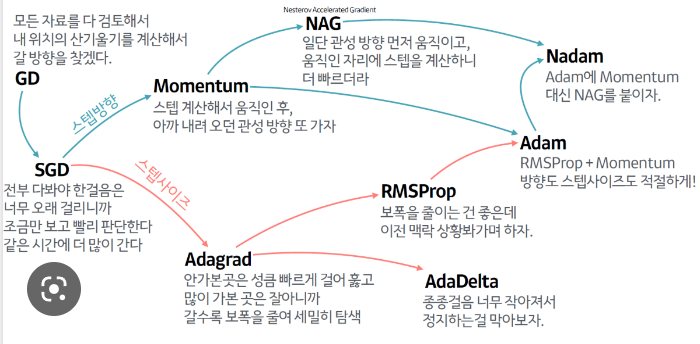
* 컴파일시 Default 옵티마이저는 rmsprop

In [18]:
# 손실함수를 통하여 최적의 가중치 절편을 찾는 방법을 optimizer 옵션에서 지정
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [19]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [20]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [21]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [22]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [23]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [24]:
model = keras.Sequential()
# Flatten층 N차원입력을 1차원 입력층으로 변경
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5262 - accuracy: 0.8154
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3940 - accuracy: 0.8589
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3546 - accuracy: 0.8702
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3284 - accuracy: 0.8794
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3058 - accuracy: 0.8872


In [26]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3509 - accuracy: 0.8751


[0.3508651852607727, 0.875083327293396]